# Load Libraries

In [ ]:
# Somehow uninstall all the nvidia libraries by pip help to make tensorflow works
# If not cuDNN error keep showing up and the code just hang
# !pip3 list | grep nvidia

In [ ]:
# !pip3 uninstall -y nvidia-cublas-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-nvrtc-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-runtime-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-cudnn-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-cufft-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-curand-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-cusolver-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-cusparse-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-nccl-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-nvjitlink-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-cuda-cupti-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-cuda-nvrtc-cu12 --break-system-packages
# !pip3 uninstall -y nvidia-cuda-runtime-cu12 --break-system-packages

In [ ]:
# !pip3 uninstall -y tensorboard
# !pip3 uninstall -y tensorboard-data-server
# !pip3 uninstall -y tensorboard-plugin-wit tensorboardX 
# !pip3 uninstall -y tensorflow
# tensorflow-addons tensorflow-datasets tensorflow-estimator tensorflow-gpu tensorflow-hub tensorflow-io-gcs-filesystem tensorflow-metadata tensorflow-model-optimization tensorflow-probability

In [1]:
import tensorflow as tf
print(tf.__version__)

2025-05-26 02:35:49.347788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-26 02:35:49.368044: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-26 02:35:49.374216: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-26 02:35:49.388801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-26 02:35:52.946873: W tensorflow/compiler/tf2

2.17.0


In [2]:
import tensorflow.keras as keras

In [3]:
# !pip3 install --upgrade tensorflow
# !pip3 install numpy==1.19.5

In [4]:
# !pip3 install --upgrade cloudpickle
# !pip3 install --upgrade dask

In [5]:
# !pip3 install keras
# !pip3 install tensorflow
# !pip3 install imbalanced-learn
# !pip3 install seaborn
# !pip3 install --upgrade typing_extensions

In [6]:
# !pip3 install --upgrade threadpoolctl
!pip3 install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: Loading egg at /lrlhps/apps/python/python-3.12.4/lib/python3.12/site-packages/xxdiff_scripts-4.0.1-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [7]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


2025-05-26 02:36:03.519465: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
import warnings
warnings.filterwarnings('ignore')

import os
import time
import joblib
import json
import csv
import pathlib
import librosa
import librosa.display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import xgboost as xgb
import seaborn as sns

from tqdm.notebook import tqdm
from PIL import Image
from matplotlib import pyplot
from collections import Counter
from pprint import pprint
from pydub import AudioSegment # sudo apt install ffmpeg
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder, 
    StandardScaler,
    MinMaxScaler,
    scale
    )
from sklearn.model_selection import (
    GridSearchCV, 
    train_test_split, 
    RepeatedStratifiedKFold, 
    cross_val_score, 
    KFold,
    StratifiedKFold
    ) 
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    roc_curve,
    roc_auc_score, 
    precision_recall_curve,
    auc,
    precision_score, 
    recall_score, 
    f1_score
    )

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.feature_selection import SelectPercentile, f_classif


# Keras
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.callbacks import Callback

# Imbalance learning
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# User Defined Functions

In [9]:
def get_NN_model(input_length):
    model = Sequential()
    
    model.add(Dense(512, activation='relu', input_shape=(input_length,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(
        optimizer= keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
        )
    
    return model

In [10]:
get_NN_model(74).summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        38,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,850 (839.26 KB)

 Trainable params: 212,930 (831.76 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [11]:
def get_NN_model(X_train):
    model = Sequential()
    
    model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(
        optimizer= keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
        )
    
    return model

In [12]:
def history_loss_acc(history):
    # List all data in history
#     print(history.history.keys())
    
    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    
    # Summarize history for accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Test'], loc='upper left')
    
    # Summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Test'], loc='upper left')
    
    # Show the plots
    plt.tight_layout()
    # plt.show()
    
    return None

In [13]:
## predictions = np.array([1 if x >= 0.5 else 0 for x in seed_final_test])
def evaluate_matrix(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    cm_df = pd.DataFrame(
        cm, 
        index=["Negative", "Positive"], 
        columns=["Negative", "Positive"]
        )
    
#     print(cm_df)

    plt.figure(figsize=(4, 4))

    sns.set(font_scale=1)

    ax = sns.heatmap(
        cm_df, 
        annot=True, 
        square=True, 
        fmt='d', 
        linewidths=.2, 
        cbar=0, 
        cmap=plt.cm.Blues
        )
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    plt.ylabel("True labels")
    plt.xlabel("Predicted labels")
    plt.tight_layout()
    plt.title('Confusion Matrix')

    # plt.show()

    # print(classification_report(
    #     y_test, 
    #     y_predict, 
    #     target_names=["Negative", "Positive"]
    #     ))
    
    return cm

In [14]:
def ROC_PR_curve(y_test, predictions):
    # Calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, predictions[:,1])
    roc_auc = auc(lr_fpr, lr_tpr)
#     print(f'ROC AUC = {round(roc_auc, 3)}')
    
    # Calculate precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, predictions[:,1])
    pr_auc = auc(recall, precision)
#     print(f'PR AUC = {round(pr_auc, 3)}')
    
    # Plot the curves for the model
    lw = 2
    plt.figure(figsize=(8, 3))
    
    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(
        lr_fpr, lr_tpr, 
        color="darkorange", 
        lw=lw, 
        label=f"ROC curve (area = {round(roc_auc, 3)})"
        )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(
        recall, precision, 
        color="blue", 
        lw=lw, 
        label=f"PR curve (area = {round(pr_auc, 3)})"
        )
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    
    # Show the plots
    plt.tight_layout()
    # plt.show()
    
    return roc_auc, pr_auc

# Load Data

In [15]:
# List of models to evaluate
models_dict = {
    "LR": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
#     "SVM": SVC(kernel='rbf', probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=3),
#     "NB": GaussianNB(),
#     "NN": MLPClassifier(hidden_layer_sizes=(100,)),
    "GB": GradientBoostingClassifier(),
    "Keras_NN": None,
}


############################################################
coswara, coughvid, esc50, fsdkaggle, virufy
############################################################
{0: 194441, 1: 71577}

##################################################
coswara coughvid esc50 fsdkaggle virufy - LR
##################################################
Train: (212814, 73)
Test : (53204, 73)
Train: (212814, 73)
Test : (53204, 73)
Train: (212814, 73)
Test : (53204, 73)
Train: (212815, 73)
Test : (53203, 73)
Train: (212815, 73)
Test : (53203, 73)
[[180216  14225]
 [ 50057  21520]]
ROC AUC: 0.7769997658091727
PR AUC: 0.5171822147882381
F1: 0.40103198969384735

##################################################
coswara coughvid esc50 fsdkaggle virufy - Decision Tree
##################################################
Train: (212814, 73)
Test : (53204, 73)
Train: (212814, 73)
Test : (53204, 73)
Train: (212814, 73)
Test : (53204, 73)
Train: (212815, 73)
Test : (53203, 73)
Train: (212815, 73)
Test : (53203, 73)


Train: (212814, 73)
Test : (53204, 73)
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.8435 - loss: 0.3487
Test Accuracy\:  0.84
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Train: (212814, 73)
Test : (53204, 73)
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.8216 - loss: 0.3508
Test Accuracy\:  0.835
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Train: (212815, 73)
Test : (53203, 73)
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 899us/step - accuracy: 0.8575 - loss: 0.3365
Test Accuracy\:  0.846
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Train: (212815, 73)
Test : (53203, 73)
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 1s 889us/step - accuracy: 0.8492 - loss: 0.3648
Test Accuracy\:  0.836
1663/1663 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


[[177834  16607]
 [ 26198  45379]]
ROC AUC: 0.9094036514642175
PR AUC: 0.7904207639644597
F1: 0.6783740279582875
############################################################
DONE
############################################################


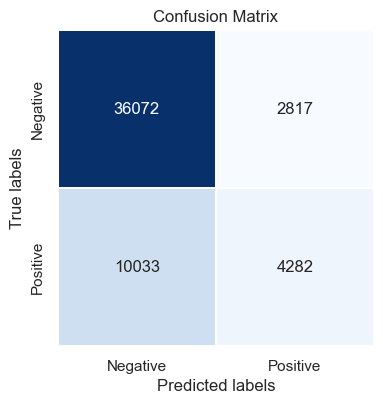

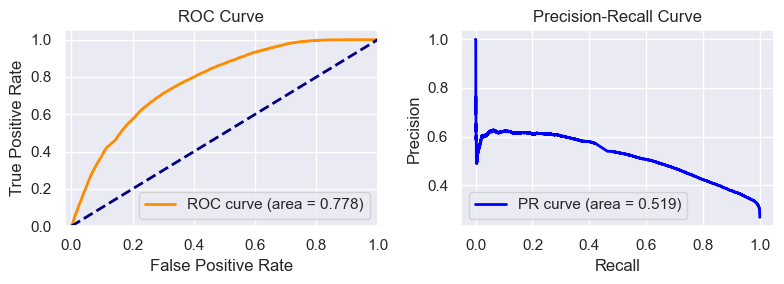

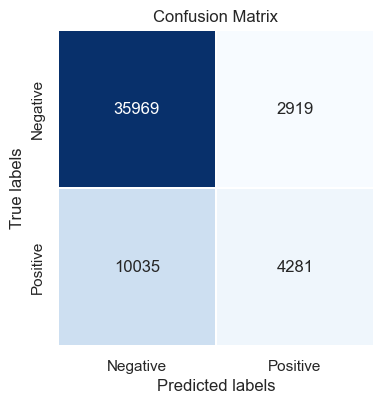

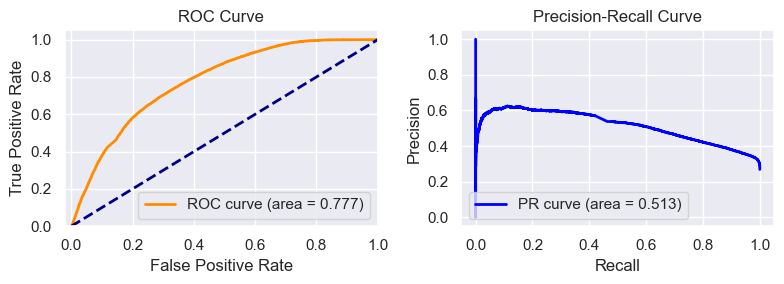

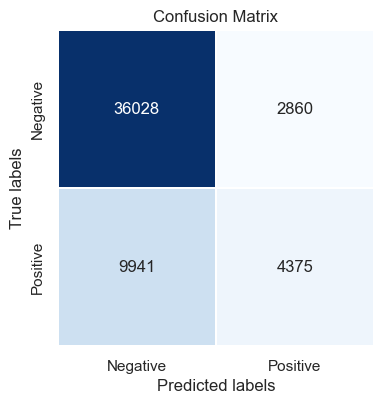

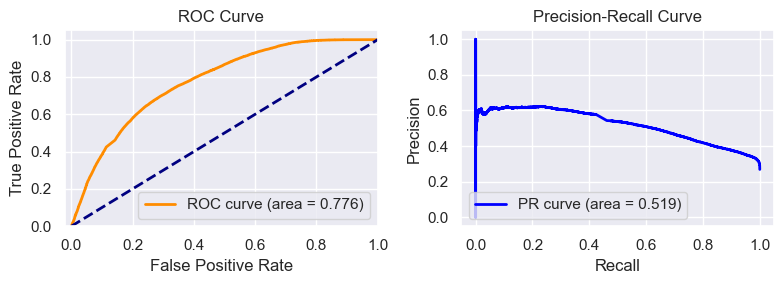

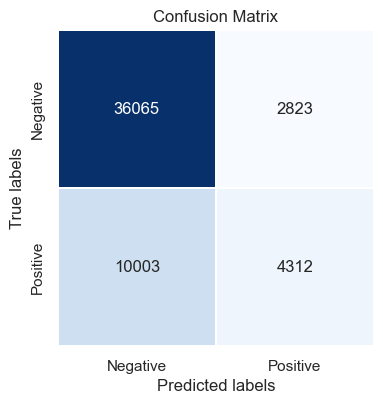

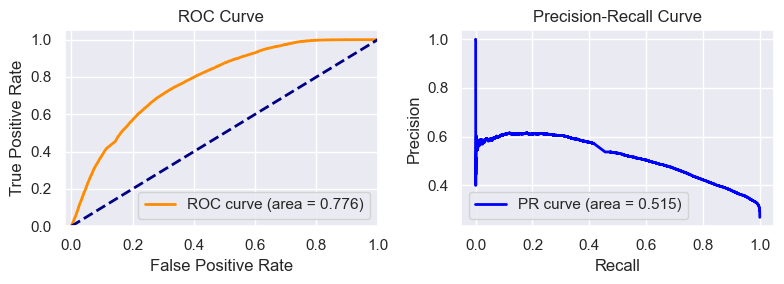

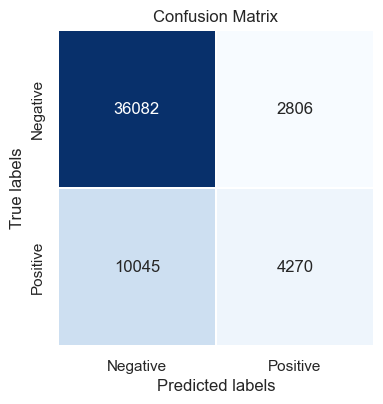

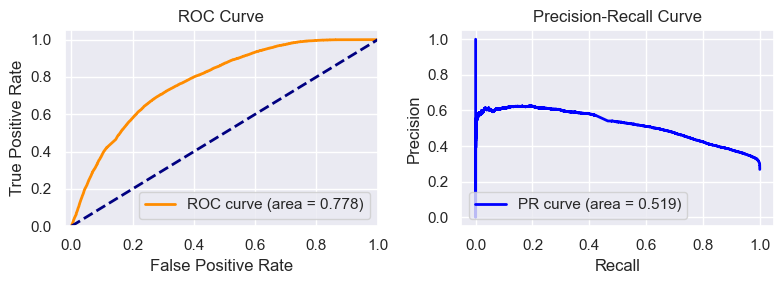

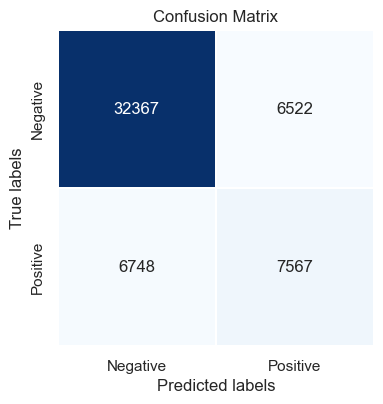

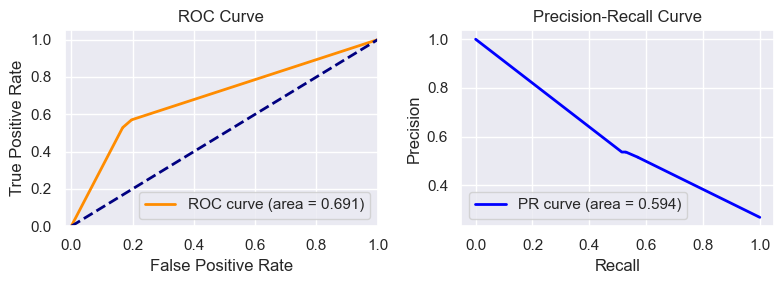

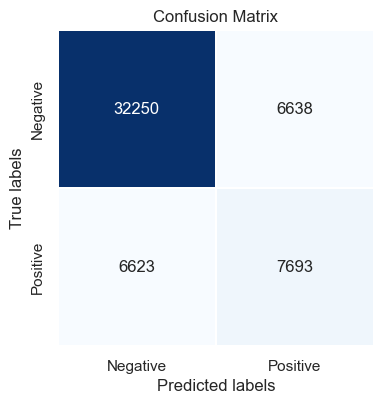

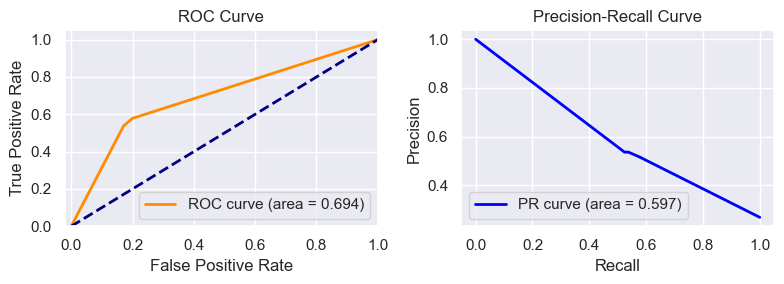

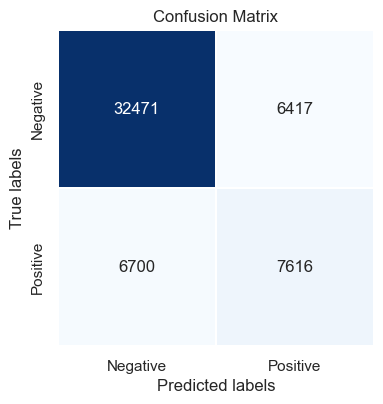

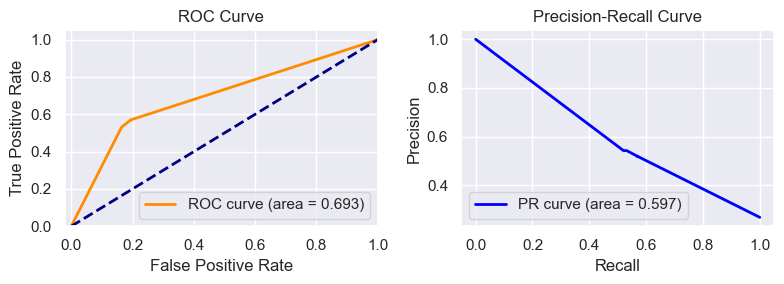

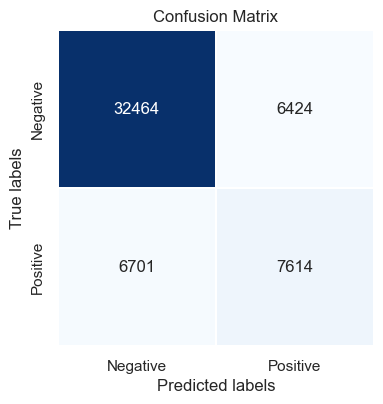

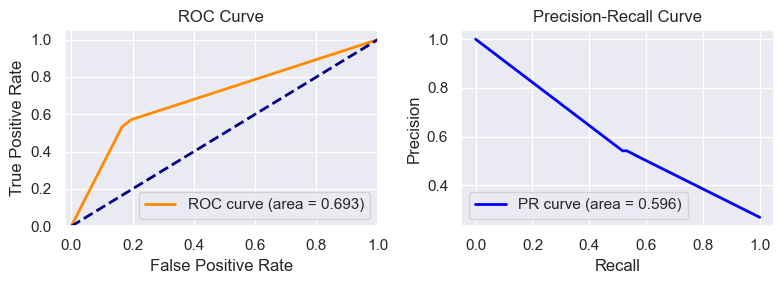

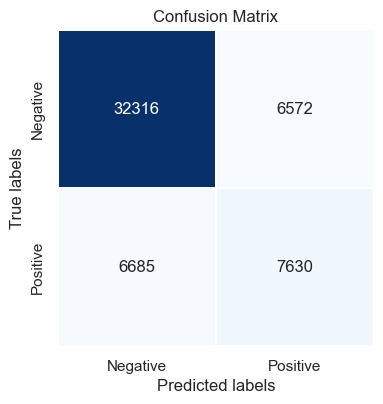

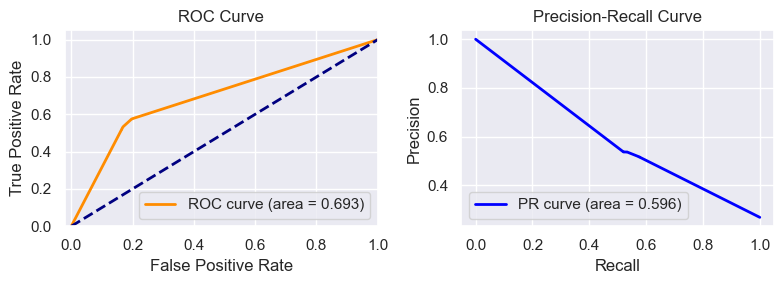

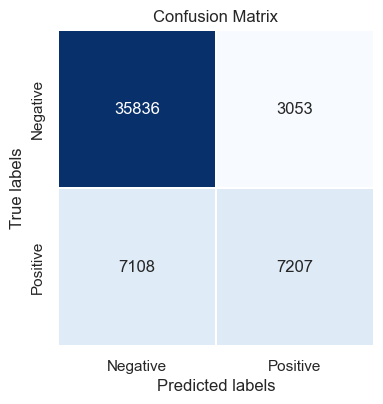

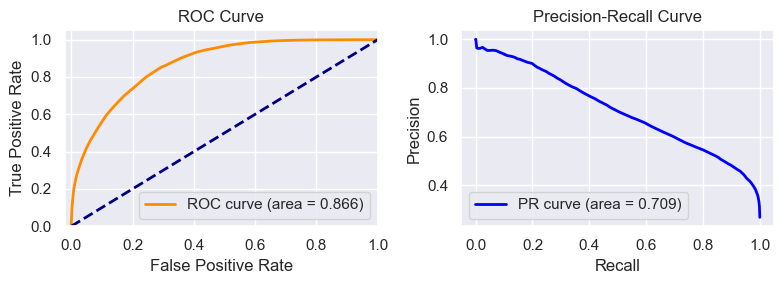

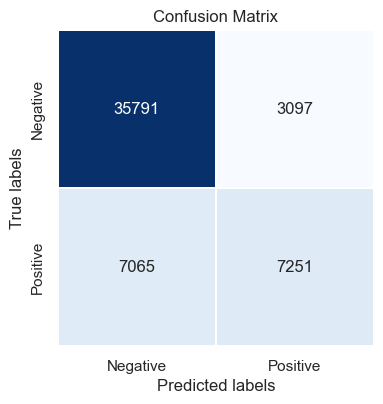

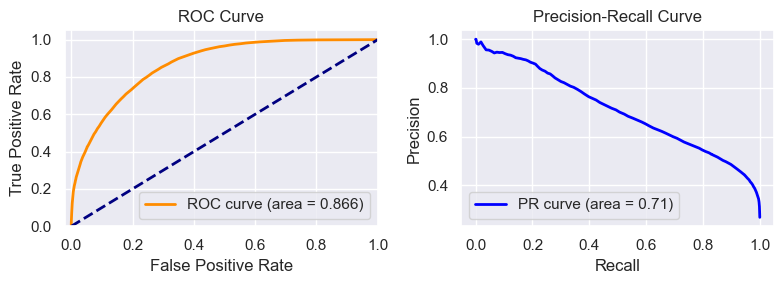

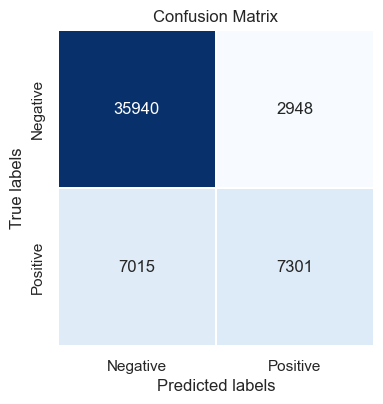

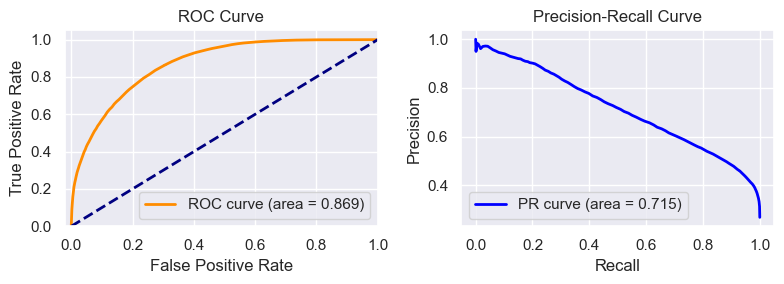

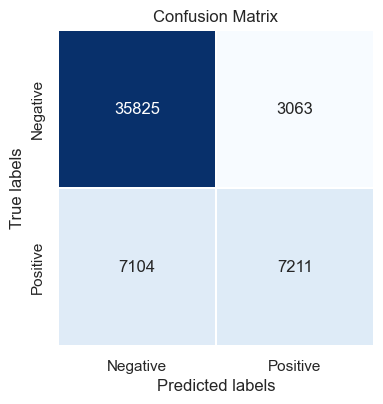

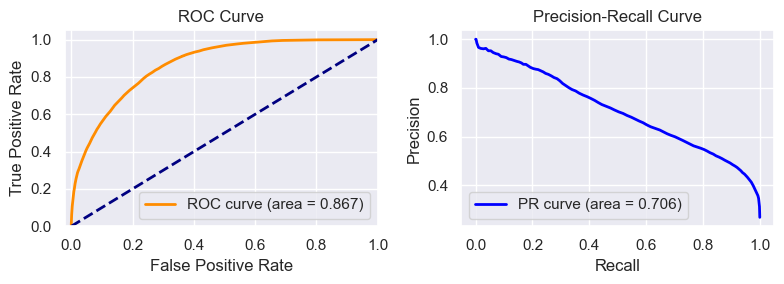

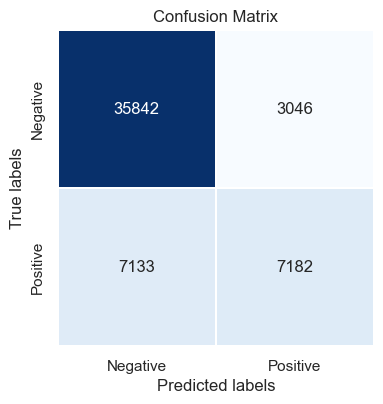

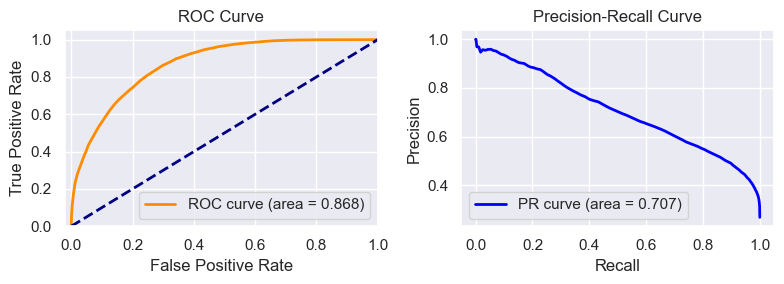

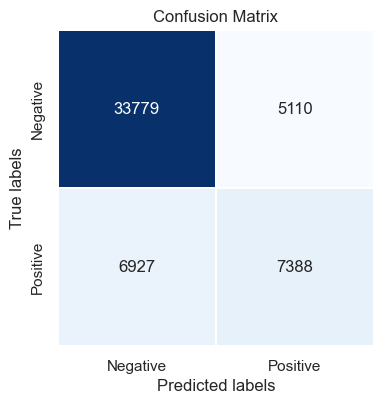

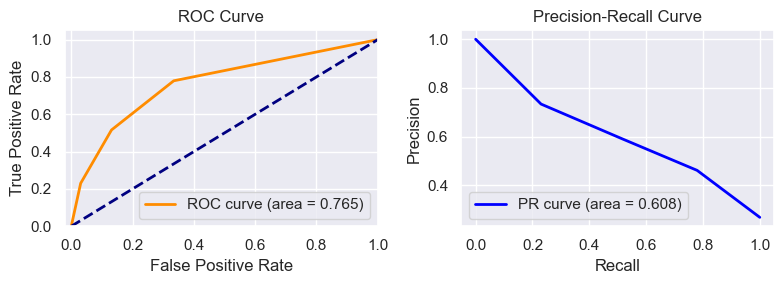

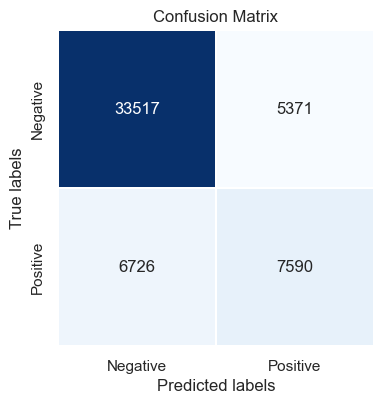

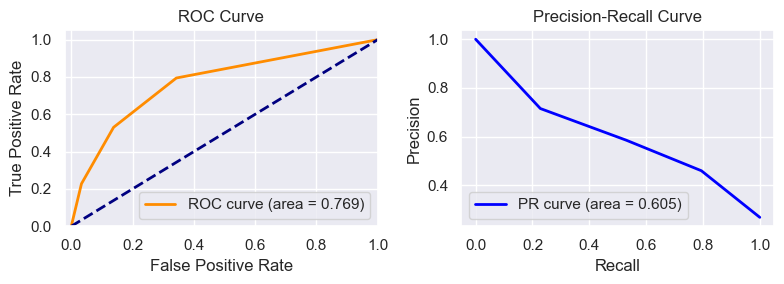

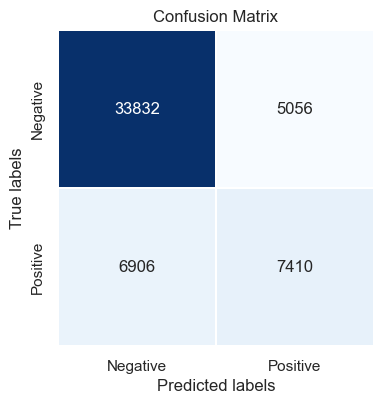

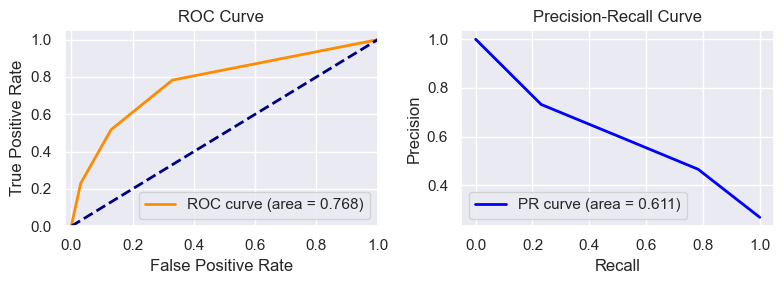

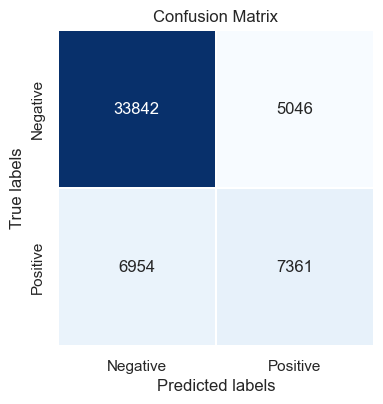

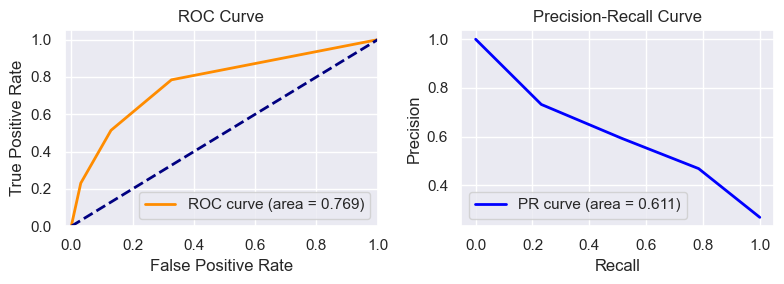

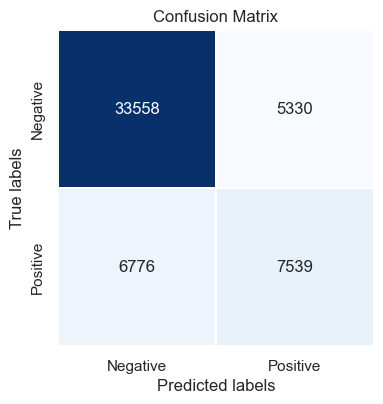

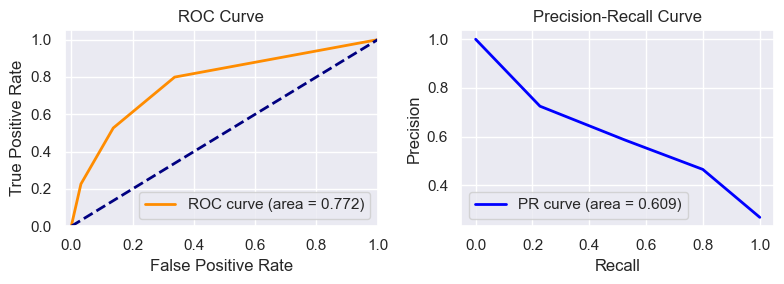

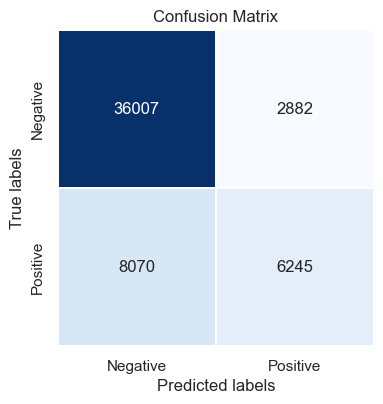

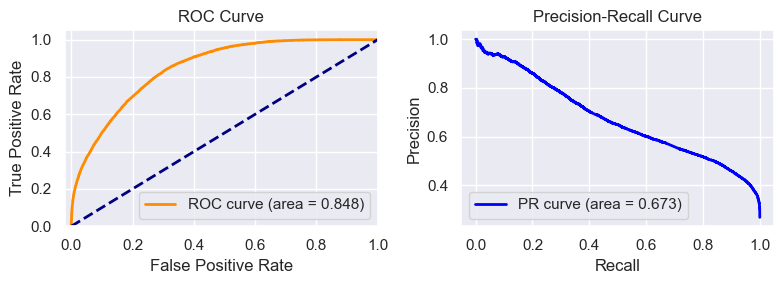

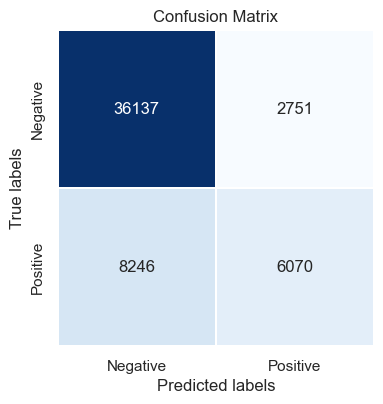

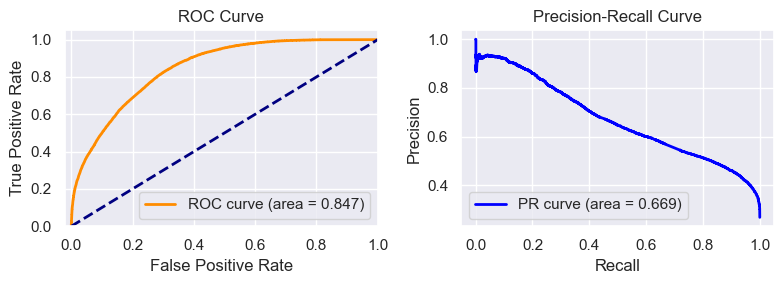

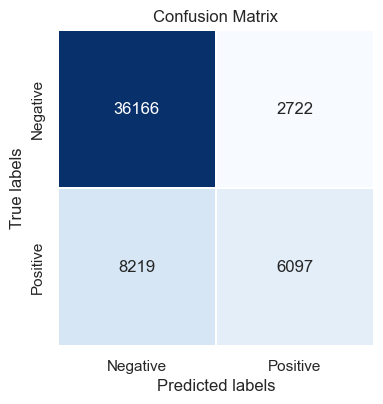

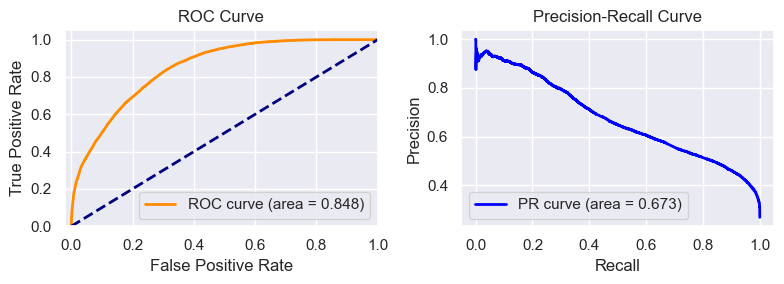

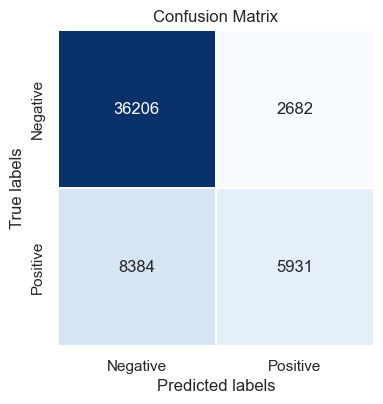

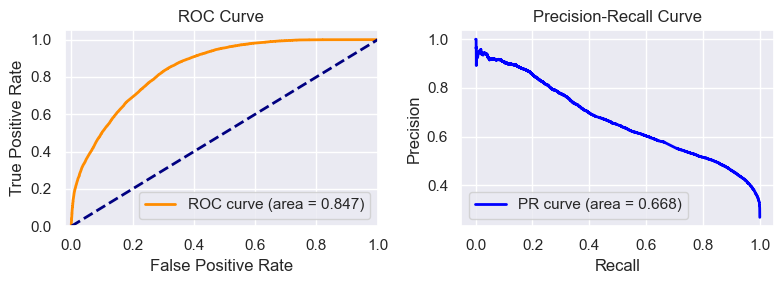

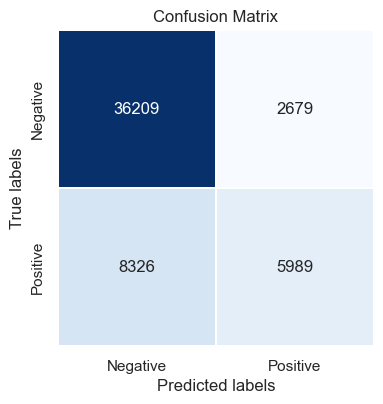

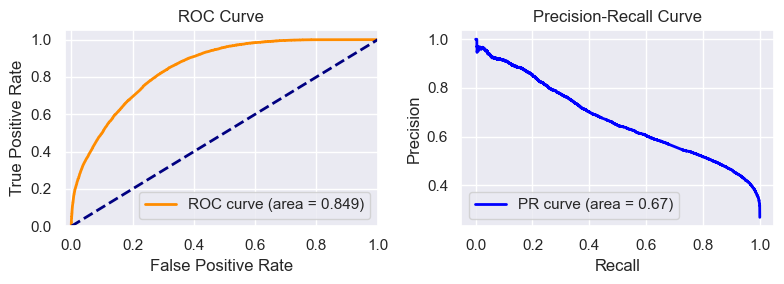

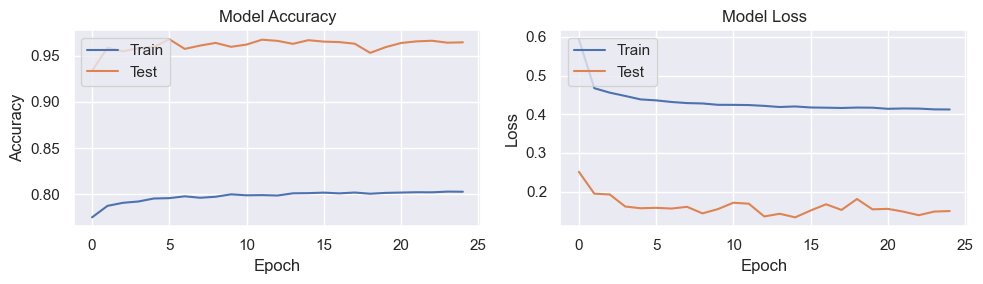

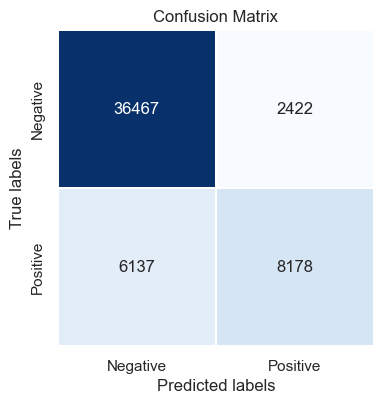

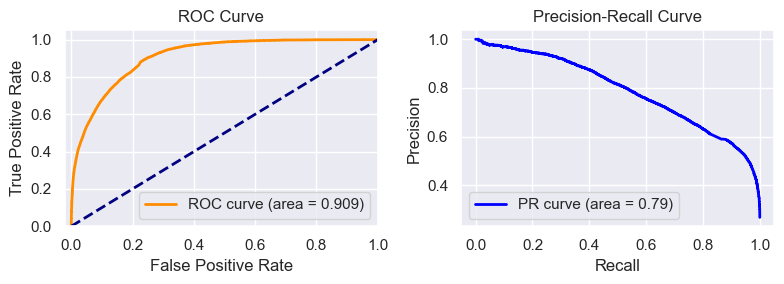

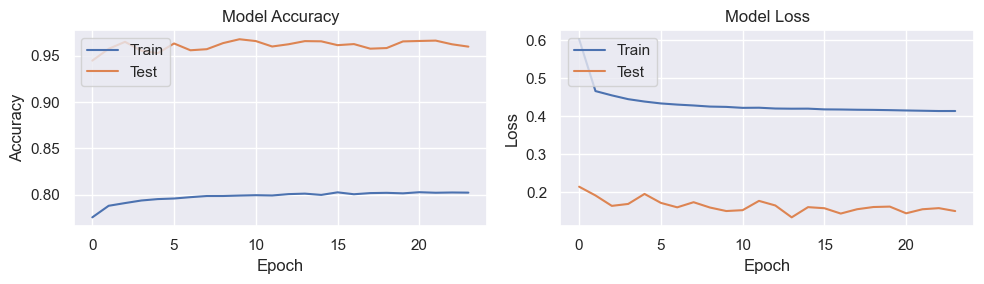

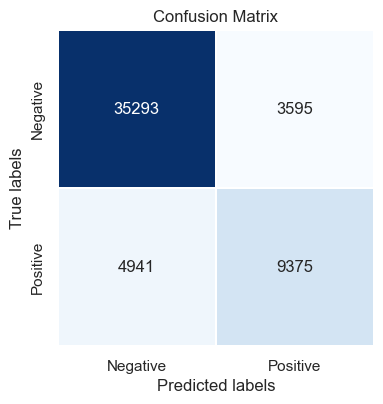

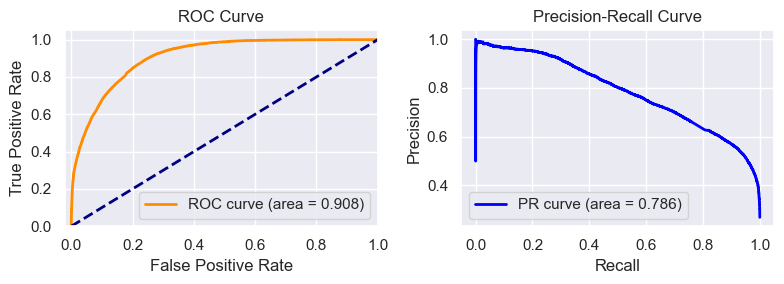

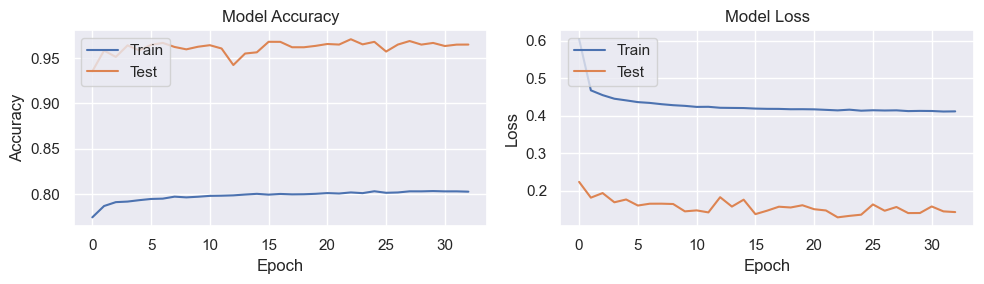

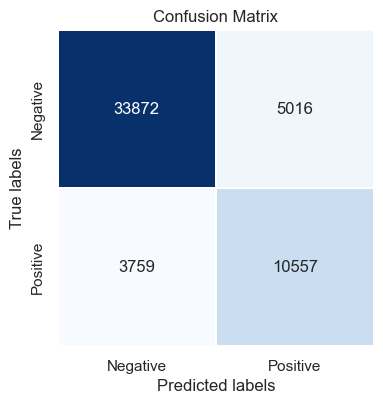

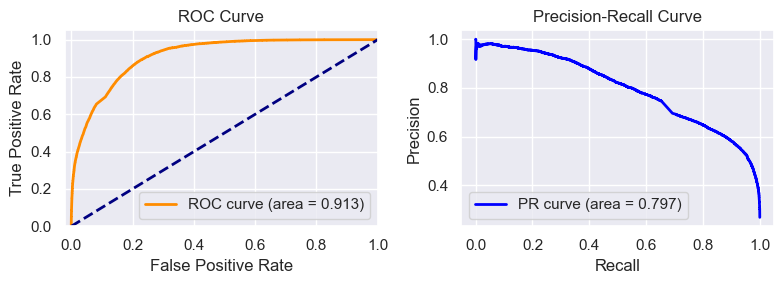

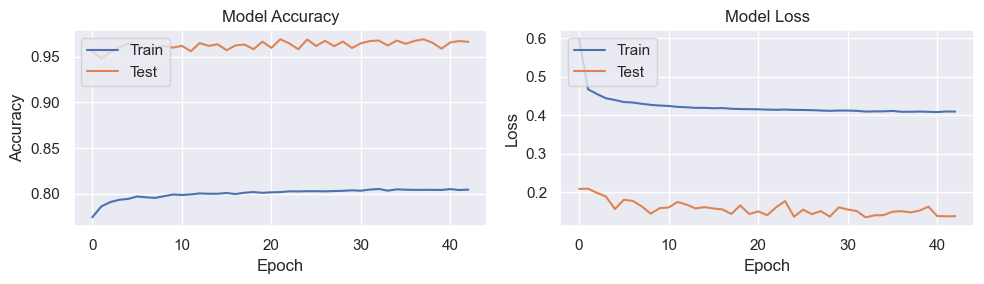

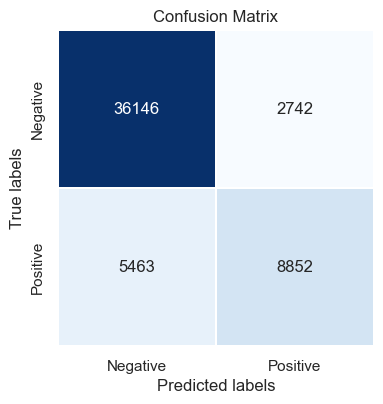

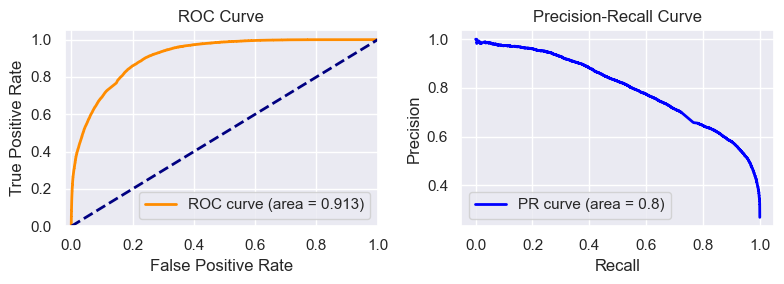

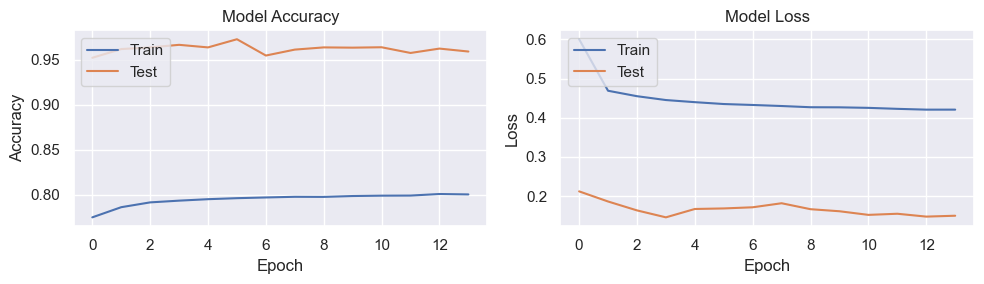

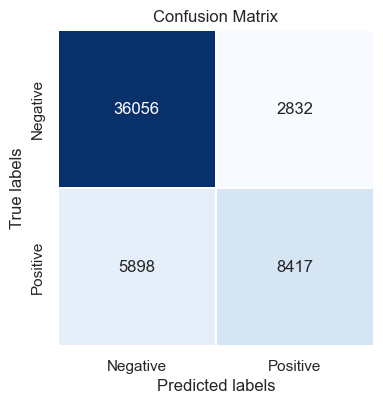

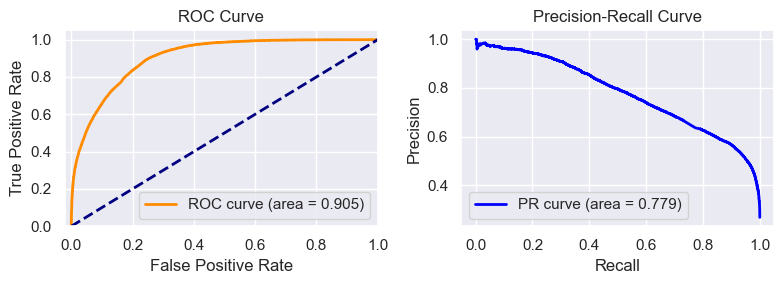

In [16]:
list_datasets = [
    # ['fsdkaggle'],    # 2% cough Counter({0: 1570, 1: 30})
    # # ['virufy'],       # 100% cough Counter({1: 121})
    # ['esc50'],        # 2% cough Counter({0: 1960, 1: 40})
    # ['coughvid'],     # 30% cough Counter({1: 19777, 0: 10267})
    # ['coswara'],      # 25% cough Counter({0: 18914, 1: 5408})
    ['coswara', 'coughvid', 'esc50', 'fsdkaggle', 'virufy'], 
      
]

# window_length = 10
window_length = 1
overlap = 0

df_results = []

for datasets in list_datasets:
    datasets.sort()
    print('')
    print('#'*60)
    print(', '.join(datasets))
    print('#'*60)
    
    dataset_str = '_'.join(datasets)
    
    path_model_save = f'Results/Model/{dataset_str}/{window_length}s/'
    
    if not os.path.exists(path_model_save):
        os.makedirs(path_model_save)
    
    ############################################################
    # Load data
    ############################################################
    df_all_combined = pd.DataFrame()
    for dataset in datasets:    
        df = pd.read_csv(f'Results/Features/data_{dataset}_features_{window_length}s_{overlap}.csv')
        df_all_combined = pd.concat([df_all_combined, df], axis=0)
    df_all_combined = df_all_combined.reset_index(drop=True)
    
    # df_all_combined = df_all_combined.fillna(df.mean())
    df_all_combined = df_all_combined.fillna(0)
    
    ############################################################
    # Get label distribution
    ############################################################
    list_labels = df_all_combined['label'].tolist()
    count_labels = dict(Counter(list_labels))
    pprint(count_labels)

    ############################################################
    # Get features and labels
    ############################################################
    y = df_all_combined['label'].tolist()
    X = df_all_combined.drop(columns=['label'])
    
    ############################################################
    # Loop different models
    ############################################################
    for model_name, model_selected in models_dict.items():
        print('')
        print('#'*50)
        print(' '.join(datasets), '-', model_name)
        print('#'*50)
    
        ############################################################
        # Performance Store
        ############################################################
        list_cm = 0
        list_roc_auc, list_pr_auc = [], []
        list_pre, list_rec, list_f1 = [], [], []
        list_acc, list_spe, list_sen = [], [], []
        
        ############################################################
        # K-fold Cross Validation model evaluation
        ############################################################
        kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        fold_idx = 1
        for train_ids, test_ids in kfold.split(X, y):
#             print("Fold", fold_idx)   

            ############################################################
            # Get dataset split
            ############################################################
            df_train = X.loc[train_ids]
            y_train = np.array(y)[train_ids]

            df_test = X.loc[test_ids]
            y_test = np.array(y)[test_ids]

            ############################################################
            # Drop useless columns
            ############################################################
            def drop_columns(df):
                columns = [
                    'dataset', 'filename', 'filepath', 'age', 'gender', 'status',
                    'duration', 'duration_segment', 'sample_frequency',
                    'mean', 'variance', 'std_dev', 'skewness', 'kurtosis',
                    'median', 'range_val', 'iqr',
                    ]
                for col in columns:
                    if col in df.columns:
                        df = df.drop([col], axis=1)

                # print(df.columns)
                df = np.array(df)
                return df

            X_train = drop_columns(df_train)
            X_test = drop_columns(df_test)

            print("Train:", X_train.shape)
            print("Test :", X_test.shape)

            ############################################################
            # Scaling
            ############################################################
            scaler = StandardScaler()

            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Save the scaler to a file
            scaler_filename = f"{path_model_save}scaler_pipeline_{fold_idx}.joblib"
            joblib.dump(scaler, scaler_filename)

            ############################################################
            # Oversampling (if required)
            ############################################################
            if datasets in [['fsdkaggle'], ['esc50']]:
                try:
                    oversample = SMOTE(sampling_strategy=0.5, k_neighbors=5)
                    X_train, y_train = oversample.fit_resample(X_train, y_train)
                except:
                    oversample = SMOTE(sampling_strategy=0.5, k_neighbors=3)
                    X_train, y_train = oversample.fit_resample(X_train, y_train)
                    
            ############################################################
            # Create Model
            ############################################################
            if model_name != 'Keras_NN':
                feature_selection = SelectPercentile(score_func=f_classif, percentile=10)
                # Create a pipeline with feature selection, scaling, and the model
                model = Pipeline([
                    ('feature_selection', feature_selection),
                    # ('scaling', scaler),
                    ('classification', model_selected)
                ])
                
                model.fit(X_train, y_train)

                predictions = model.predict_proba(X_test)
                y_predict = []
                for i in range(len(predictions)):
                    predict = np.argmax(predictions[i])
                    y_predict.append(predict)
        
            else:
                model = get_NN_model(X_train)
                # model.summary()

                batch_size = 16
                early_stopping_patience = 10

                # Add early stopping
                my_callbacks = [
                    tf.keras.callbacks.ModelCheckpoint(
                        filepath=path_model_save + 'Checkpoints/model_{epoch:02d}_' + f'{fold_idx}.keras', 
                        save_freq='epoch', 
                        save_best_only=True
                        ),
                    tf.keras.callbacks.EarlyStopping(
                        monitor="val_loss", 
                        patience=early_stopping_patience, 
                        restore_best_weights=True
                        )
                ]

                # Fit Model
                history = model.fit(
                    X_train, y_train,
                    epochs=100,
                    batch_size=batch_size,
                    callbacks=my_callbacks,
                    validation_split=0.15,
                    verbose=0,
                    )

                history_loss_acc(history)
        
                test_loss, test_acc = model.evaluate(X_test, y_test)
                print('Test Accuracy\: ', round(test_acc, 3))

                predictions = model.predict(X_test)
                y_predict = []
                for i in range(len(predictions)):
                    predict = np.argmax(predictions[i])
                    y_predict.append(predict)
                        
            ############################################################
            # Append predictions to df_test and save
            ############################################################
            df_test['true'] = y_test
            df_test['pred'] = y_predict
            
            path_results_save = f'Results/Results/{dataset_str}/{window_length}s/{model_name}/'
            if not os.path.exists(path_results_save):
                os.makedirs(path_results_save)
            
            df_test.to_csv(f'{path_results_save}Fold_{fold_idx}.csv', index=False)
            
            ############################################################
            # Get evaluation metrics
            ############################################################
            acc = accuracy_score(y_test, y_predict)
            cm = evaluate_matrix(y_test, y_predict)
            roc_auc, pr_auc = ROC_PR_curve(y_test, predictions)
            pre = precision_score(y_test, y_predict)
            rec = recall_score(y_test, y_predict)
            f1 = f1_score(y_test, y_predict)
            tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
            spe = tn / (tn + fp)
            sen = rec
            
            ############################################################
            # Append results
            ############################################################
            list_acc.append(acc)
            list_cm = list_cm + cm
            list_roc_auc.append(roc_auc)
            list_pr_auc.append(pr_auc)
            list_pre.append(pre)
            list_rec.append(rec)
            list_f1.append(f1)
            list_spe.append(spe)
            list_sen.append(sen)
            
            ############################################################
            # Save model
            ############################################################
            if model_name == 'Keras_NN':
                # Serialize model to JSON
                model_json = model.to_json()
                with open(f"{path_model_save}model_{fold_idx}.json", "w") as json_file:
                    json_file.write(model_json)
                
                model.save_weights(f"{path_model_save}model_{fold_idx}.weights.h5")
                model.save(f"{path_model_save}model_{fold_idx}.h5")
                # loaded_model = get_model()
                # loaded_model.load_weights('Results/Model/kfold.h5')
                
            else:
                model_filename = f"{path_model_save}{model_name}_pipeline_{fold_idx}.joblib"
                joblib.dump(model, model_filename)

            ############################################################
            # Save results
            ############################################################
            results = [
                ', '.join(datasets), count_labels, 
                window_length, overlap,
                model_name, fold_idx,
                acc, sen, spe, pre, rec, f1, roc_auc, pr_auc, cm]
            df_results.append(results)

            # To the next fold
            fold_idx = fold_idx + 1
            
        results = [
            ', '.join(datasets),  count_labels,
            window_length, overlap,
            model_name, 'Avg',
            np.mean(list_acc),
            np.mean(list_sen),
            np.mean(list_spe),
            np.mean(list_pre),
            np.mean(list_rec),
            np.mean(list_f1),
            np.mean(list_roc_auc),
            np.mean(list_pr_auc),
            list_cm]
        df_results.append(results)
        
        print(list_cm)
        print(f'ROC AUC: {np.mean(list_roc_auc)}')
        print(f'PR AUC: {np.mean(list_pr_auc)}')
        print(f'F1: {np.mean(list_f1)}')

columns = ['dataset', 'label_count', 'window_length', 'overlap',
           'model', 'fold', 
           'acc', 'sen', 'spe', 'pre', 'rec', 'f1', 'auc', 'auprc', 'cm']    
df_results = pd.DataFrame(df_results, columns = columns)
df_results.to_csv(f'Results/results_prediction_{window_length}s_{overlap}.csv', index=False)

print('#'*60)
print('DONE')
print('#'*60)